# Plotting with `matplotlib`

- most widely used Python framework for plotting data
- integrates well with `numpy`
- can do line plots, 2D images, 3D surfaces
- output in window, IPython notebook, or directly in a file
- integration with $\mathrm{\TeX}$ typesetting possible

## Line Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['text.usetex'] = True

# first some data to plot
x = np.linspace(0., 2.0 * np.pi, 100)
y = np.sin(x)

The `plot` function produces simple line plots, which can be customized using keyword arguments.

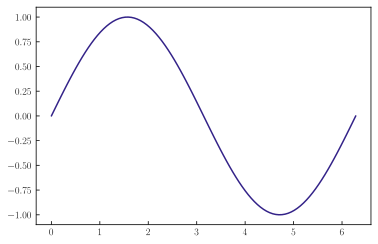

In [2]:
plt.plot(x,y)

All plot commands plot into the same space until a new figure is created using `plt.figure()`. Notebooks do this implicitly after every code block. Colours are automatically cycled.

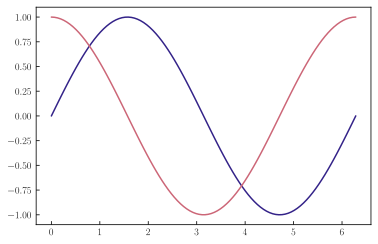

In [3]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Markers
Data points can be marked using different symbols. `plot?` gives an overview.

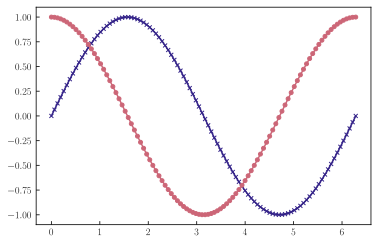

In [4]:
plt.plot(x, np.sin(x), marker='x', markersize=4)
plt.plot(x, np.cos(x), marker='o', markersize=4)

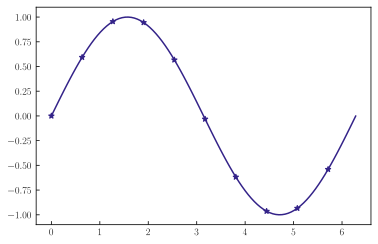

In [5]:
# use fewer markers
plt.plot(x, np.sin(x), marker='*', markevery=10)

### Line styles
Controlled using the `linestyle` or `ls` keyword argument. Styles are described in the docstring (`plot?`).

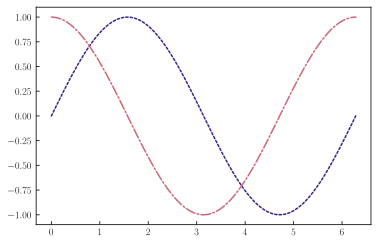

In [6]:
plt.plot(x, np.sin(x), ls=':')
plt.plot(x, np.cos(x), ls='-.')

### Colours
Specified using one-letter abbreviations, full names, or hex RGB value.

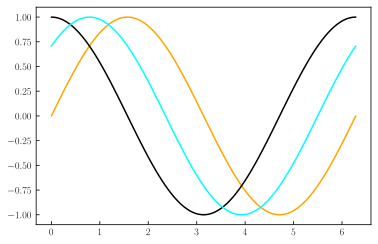

In [7]:
plt.plot(x, np.sin(x), color="orange")
plt.plot(x, np.cos(x), color="k")
plt.plot(x, np.sin(x+0.25*np.pi), color="#00FFFF")

Markers can have different edge and face colours.

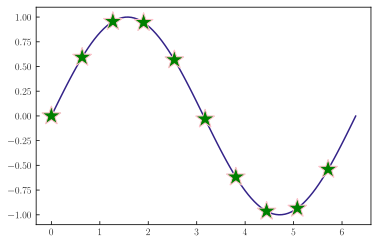

In [8]:
plt.plot(x, np.sin(x), marker='*', ms=20, markevery=10, markeredgecolor="pink", markerfacecolor="green")

### Legend
Labels can be given to lines for use in a legend.

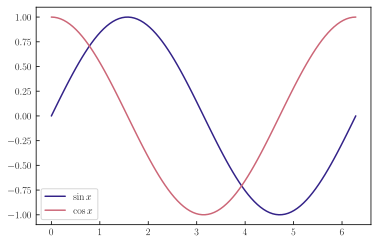

In [9]:
plt.plot(x, np.sin(x), label="$\sin x$")
plt.plot(x, np.cos(x), label="$\cos x$")
plt.legend()

`legend` takes many keyword arguments for placement and formatting.

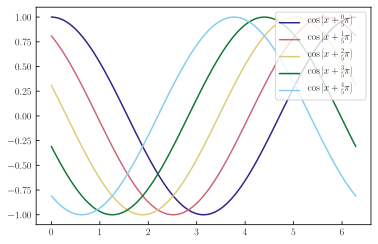

In [10]:
for i in range(5):
    plt.plot(x, np.cos(x + i / 5.0 * np.pi ), label=r"$\cos\left(x + \frac{%d}{5}\pi\right)$" % i)
plt.legend(loc="upper right")

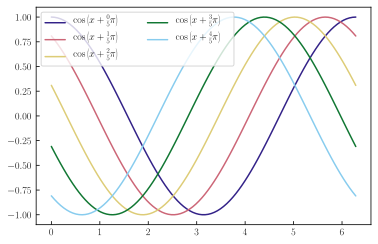

In [11]:
for i in range(5):
    plt.plot(x, np.cos(x + i / 5.0 * np.pi ), label=r"$\cos\left(x + \frac{%d}{5}\pi\right)$" % i)
plt.legend(loc="best", ncol=2)

## Scatter plots
Just showing markers without the lines. Takes almost all the arguments of `plot`.

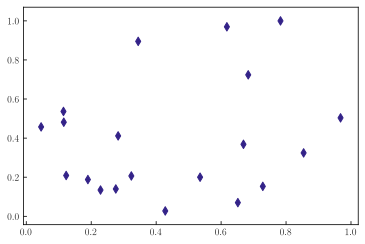

In [12]:
x = np.random.rand(20)
y = np.random.rand(20)
plt.scatter(x,y, marker='d')

## Adjusting the axes

In [13]:
x = np.linspace(0,10,100)

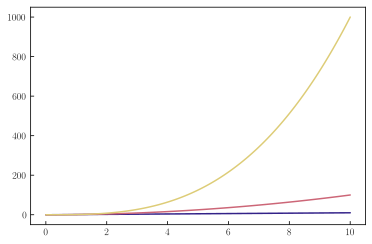

In [14]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

Axis limits can be adjusted.

(0.0, 10.0)

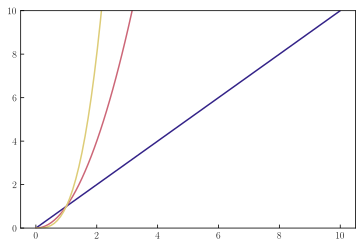

In [15]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.ylim(0., 10.)

Just one limit can be set as well, leaving the other at the automatic value.

(-50.0, 10.0)

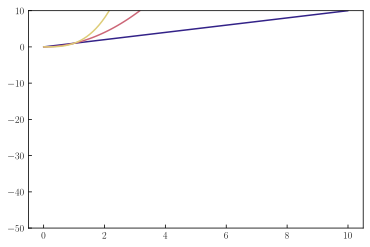

In [16]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.ylim(ymax=10.)

Axes can be set to logarithmic mode.

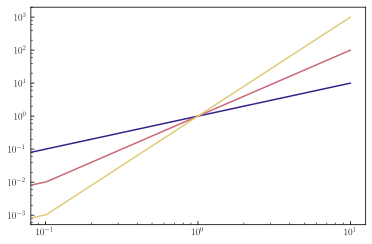

In [17]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.yscale('log')
plt.xscale('log')

For convenience there are variants of `plot` that do this automatically: `semilogx`, `semilogy`, `loglog`.<br/>
When plotting to an interactive window, try pressing `l` and `k` to switch log mode.

#### Labels
Everything put in `$` delimiters is automatically rendered using $\mathrm{\LaTeX}$ math syntax.

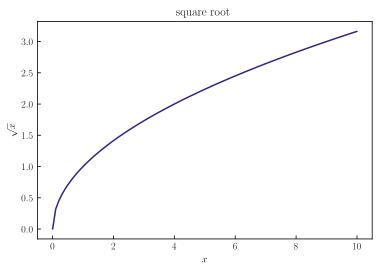

In [18]:
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

The plots so far have been rendered directly using $\mathrm{\LaTeX}$, which depends on `latex` and some other tools being installed. Alternatively there is an internal font engine which also supports math syntax.

In [19]:
plt.rcParams['text.usetex'] = False

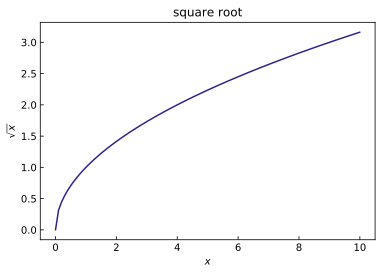

In [20]:
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

#### Fonts
The internal font engine can use any installed font.

In [21]:
plt.rcParams['font.family'] = 'serif'

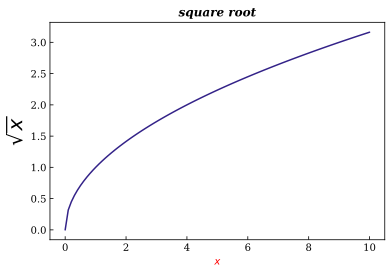

In [22]:
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$', color='red')
plt.ylabel(r'$\sqrt{x}$', fontsize=20)
plt.title('square root', weight='bold', style="italic")

#### Styles
There can be substantial changes in the way plots look like.

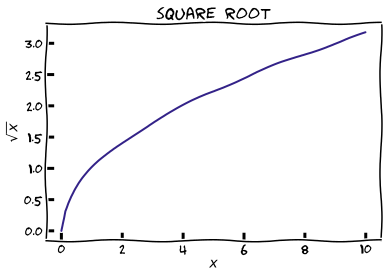

In [23]:
plt.xkcd()
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

There is a couple of default styles. New ones can be added using using files in the matplotlib config dir (on Unix: `~/.config/matplotlib/stylelib`). Useful for keeping settings for different journals.

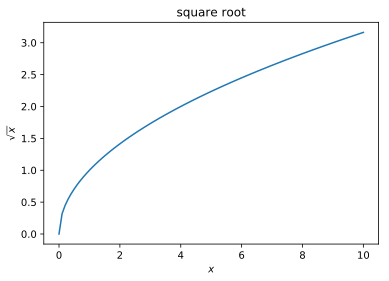

In [24]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [6,4]
plt.plot(x, np.sqrt(x))
plt.xlabel('$x$')
plt.ylabel(r'$\sqrt{x}$')
plt.title('square root')

#### Annotations
Text can be placed anywhere in the figure. Positions can be specified using data or figure coordinates.

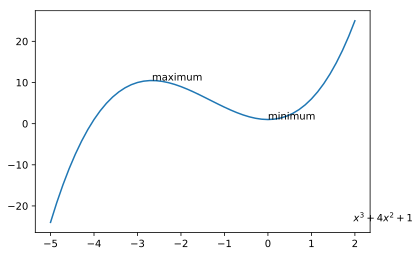

In [25]:
x = np.linspace(-5,2)
f = lambda x: x**3 + 4 * x**2 + 1
plt.plot(x,f(x))
plt.annotate('minimum', [0,1]) # coordinates are in data space by default
plt.annotate('maximum', [-8./3., f(-8./3.)])
plt.annotate(r'$x^3 + 4 x^2 + 1$', [0.95, 0.05], xycoords='axes fraction')
# position in current plot independent of data

This does not look nice. Elements can be put at an offset of the point they annotate. Alignment can be set.

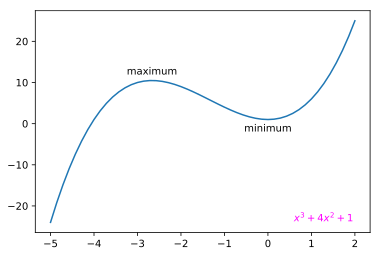

In [26]:
plt.plot(x,f(x))
plt.annotate('minimum', [0,1], xytext=[0,-12], textcoords='offset points',
             horizontalalignment='center')
plt.annotate('maximum', [-8./3., f(-8./3.)], xytext=[0,6],
             textcoords='offset points', horizontalalignment='center')
plt.annotate(r'$x^3 + 4 x^2 + 1$', [0.95, 0.05], xycoords='axes fraction',
             ha='right', color='fuchsia') # ha is short for horizontalalignment
# same text formatting options as for labels

Arrows might be nice.

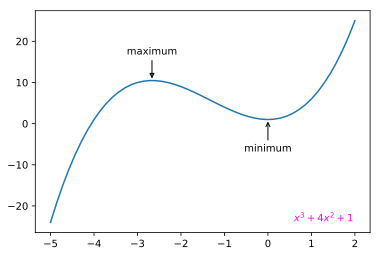

In [27]:
plt.plot(x,f(x))
plt.annotate('minimum', [0,1], xytext=[0,-32],
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), ha='center')
plt.annotate('maximum', [-8./3., f(-8./3.)], xytext=[0,26],
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'), ha='center')
plt.annotate(r'$x^3 + 4 x^2 + 1$', [0.95, 0.05], xycoords='axes fraction',
             ha='right', color='fuchsia')

### Lines and areas

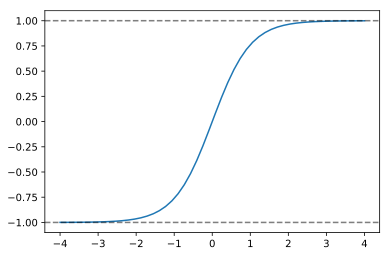

In [28]:
x=np.linspace(-4,4)
plt.plot(x, np.tanh(x))
plt.axhline(1, ls="--", color='k', alpha=0.5) # slightly transparent
plt.axhline(-1, ls="--", color='k', alpha=0.5)

There is also `axvline`.

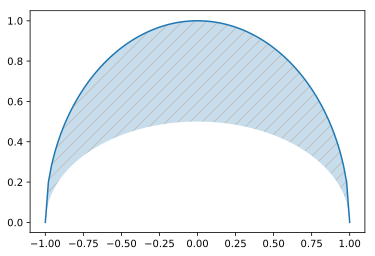

In [29]:
x=np.linspace(-1,1, 100)
f = lambda x: np.sqrt(1-x**2)
g = lambda x: 0.5 * np.sqrt(1-x**2)
plt.plot(x, f(x))
plt.fill_between(x, f(x), y2=g(x), alpha=0.25, hatch='//')

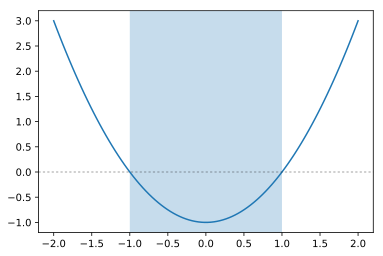

In [30]:
x=np.linspace(-2,2, 100)
plt.plot(x, x**2-1)
plt.axvspan(-1,1, alpha=0.25) # also axhspan
plt.axhline(0, ls=':', alpha=0.25, color='k')

### Shared axes
When plotting two quantities with different scales, it can be useful to plot both in the same plot with the same x-axis but a different y-axis.

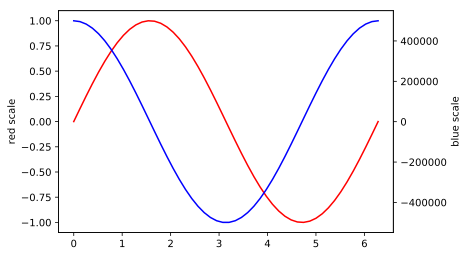

In [31]:
x = np.linspace(0., 2 * np.pi)
plt.plot(x, np.sin(x), color='r')
plt.ylabel('red scale')
plt.twinx()
plt.plot(x, 5e5 * np.cos(x), color='b')
plt.ylabel('blue scale')

There is an equivalent `twiny` function. This is can be used to show the x-coordinate in two different units.

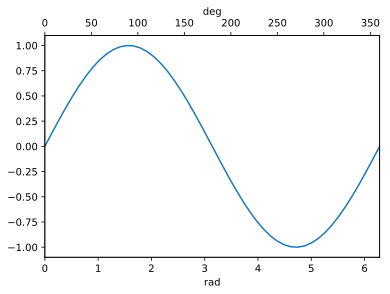

In [32]:
plt.plot(x, np.sin(x))
plt.xlim(0,2 * np.pi)
plt.xlabel('rad')
plt.twiny()
plt.xlim(0.,360.)
plt.xlabel('deg')

### Manipulating ticks
By default ticks are automatically placed and formatted. Both can be overridden if needed. 

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]), <a list of 9 Text xticklabel objects>)


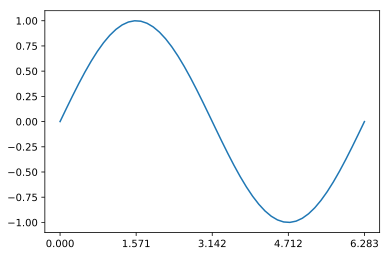

In [33]:
plt.plot(x, np.sin(x))
# extract current ticks and labels
print(plt.xticks())
# specify ticks explicitly
_ = plt.xticks([0, 0.5 * np.pi, np.pi, 1.5 * np.pi, 2. * np.pi])

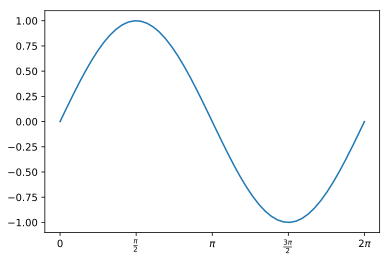

In [34]:
plt.plot(x, np.sin(x))
# specify ticks and labels explicitly
_ = plt.xticks([0, 0.5 * np.pi, np.pi, 1.5 * np.pi, 2. * np.pi],
               ["0", r"$\frac{\pi}{2}$", r"$\pi$",
                r"$\frac{3\pi}{2}$", r"$2\pi$"])

Tick appearance and the automatic locations can be modified as well.

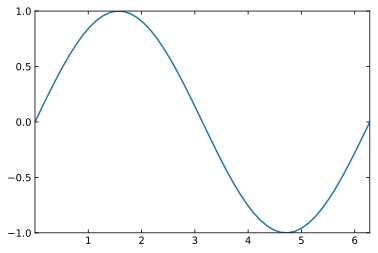

In [35]:
plt.plot(x, np.sin(x))
plt.autoscale(tight=True) # tight plot boundaries
plt.tick_params(direction='in', top='on', right='on')
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', prune='lower')

Minor ticks can be switched on and then manipulated through `plt.tick_params`.

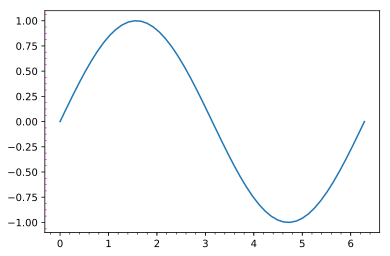

In [36]:
plt.plot(x, np.sin(x))
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', colors='magenta', direction='in')

### Grids
A grid for major or minor ticks can be added. See the `plt.grid` function.

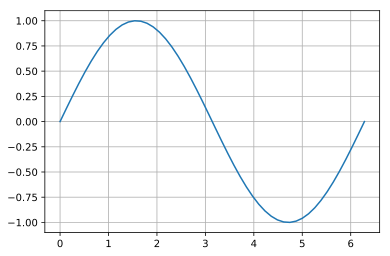

In [37]:
plt.plot(x, np.sin(x))
plt.grid()

## Plotting 2D data
Pseudo-colour plots can visualise a 2D quantity or a slice through 3D space.

In [38]:
# first generate some data
X, Y = np.meshgrid(np.linspace(-1,1,200), np.linspace(-1,1,200))
Z = np.exp(- (X**2 + Y**2))

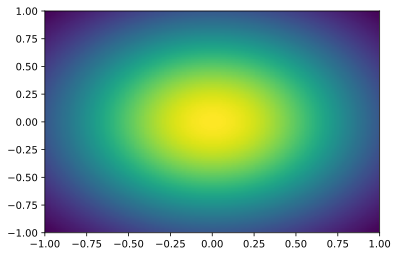

In [39]:
plt.pcolor(X, Y, Z, rasterized=True)
# Produces a raster image for the plot
# but vector graphics for the labels, etc.
# Results in a much smaller image,
# which loads faster at almost no loss in quality.

(-1.0, 1.0, -1.0, 1.0)

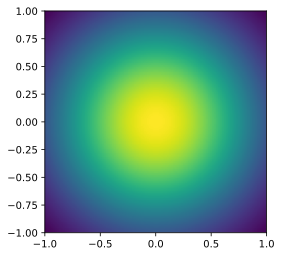

In [40]:
# This type of plot profits from a 1:1 aspect ratio.
plt.pcolor(X, Y, Z, rasterized=True)
plt.axis('image')

### Colour bars
A bar showing the colour scale can be added. The `colorbar` function automatically takes the scale of the last `pcolor` plot and reduces the size of the figure to make space for the colour bar.

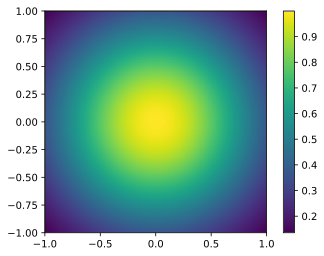

In [41]:
plt.pcolor(X, Y, Z, rasterized=True)
plt.axis('image')
plt.colorbar()

The `Colorbar` object also has ticks and labels that can be adjusted.

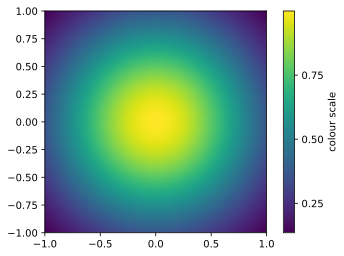

In [42]:
plt.pcolor(X, Y, Z, rasterized=True)
plt.axis('image')
cbar = plt.colorbar()
cbar.set_label('colour scale')
cbar.set_ticks([0,0.25,0.5,0.75,1.0])
# only ticks within current limits are shown

### Specifying limits
The colour scale is normally adjusted to the minimum and maximum value of the data but can be fixed to other values.

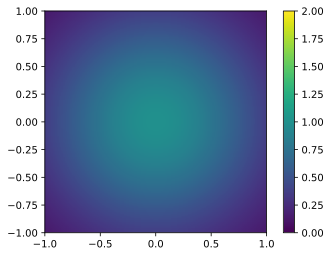

In [43]:
plt.pcolor(X, Y, Z, rasterized=True, vmin=0.0, vmax=2.0)
plt.axis('image')
cbar = plt.colorbar()

This can be used to prevent single points with much higher values to determine the scale.

In [44]:
Z[50,50] = 500.

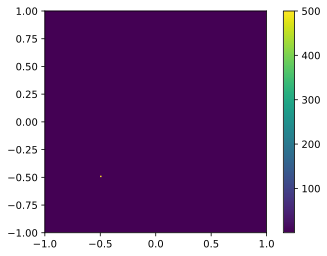

In [45]:
plt.pcolor(X, Y, Z, rasterized=True)
plt.axis('image')
cbar = plt.colorbar()

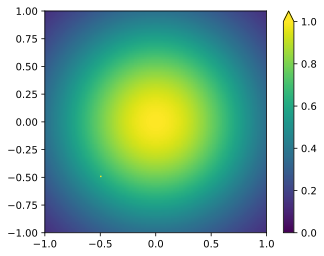

In [46]:
plt.pcolor(X, Y, Z, rasterized=True, vmin=0.0, vmax=1.0)
plt.axis('image')
# Optionally the colour bar can be modified to indicate
# that some values exceed the limit.
plt.colorbar(extend='max')

Values can mapped to colours logarithmically.

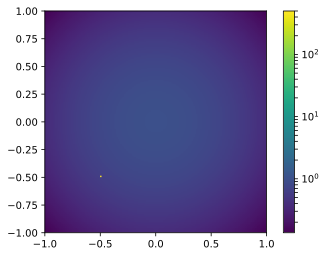

In [47]:
import matplotlib.colors
plt.pcolor(X, Y, Z, rasterized=True, norm=matplotlib.colors.LogNorm())
plt.axis('image')
plt.colorbar()

### Colour maps
The choice of colour map is crucial for the usefulness of a pseudo colour plot. `matplotlib` has many built-in choices and has the option to construct new maps.

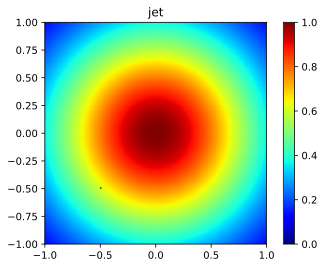

In [48]:
# The jet colour map known from older versions of Matlab and the default in matplotlib until version 2.
plt.pcolor(X, Y, Z, rasterized=True, vmin=0.0, vmax=1.0, cmap='jet')
plt.axis('image')
plt.colorbar()
plt.title('jet')

The `jet` coulor map has the problem that it is hard to judge which values are higher, especially in black and white printouts. Significant effort went into designing a new default for `matplotlib` version 2. It is called `viridis`.

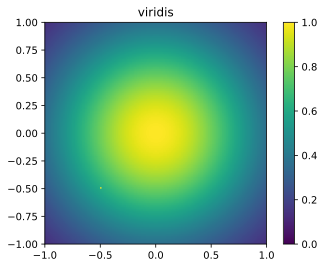

In [49]:
plt.pcolor(X, Y, Z, rasterized=True, vmin=0.0, vmax=1.0, cmap='viridis')
plt.axis('image')
plt.colorbar()
plt.title('viridis')

#### More information on the new colour map

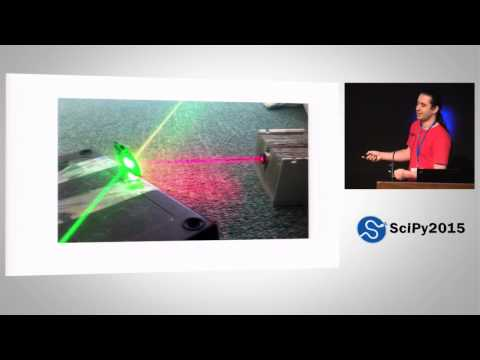

In [50]:
from IPython.display import YouTubeVideo
YouTubeVideo("xAoljeRJ3lU")

Spectral maps are useful for identifying individual levels.

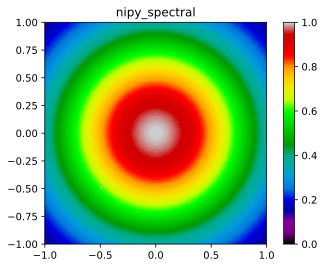

In [51]:
plt.pcolor(X, Y, Z, rasterized=True, vmin=0.0, vmax=1.0, cmap='nipy_spectral')
plt.axis('image')
plt.colorbar()
plt.title('nipy_spectral')

For some data it is crucial if they are above or below a certain value. Diverging colour maps are handy here.

In [52]:
X, Y = np.meshgrid(np.linspace(0,2*np.pi,200), np.linspace(0,2*np.pi,200))
Z = np.sin(X)*np.cos(Y)

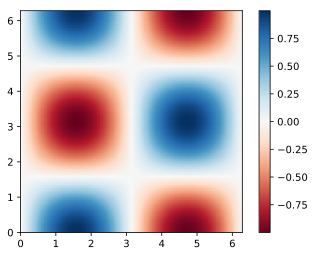

In [53]:
plt.pcolor(X, Y, Z, rasterized=True, cmap='RdBu')
# Red/Blue diverging
plt.axis('image')
plt.colorbar()

All predefined colour maps can be inverted by appending `_r` to the name.

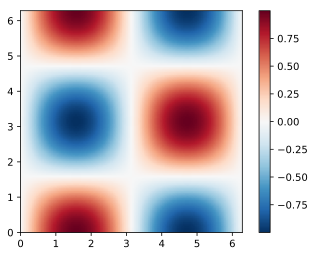

In [54]:
plt.pcolor(X, Y, Z, rasterized=True, cmap='RdBu_r')
# Red/Blue diverging
plt.axis('image')
plt.colorbar()

### Non-Cartesian grids
The `X` and `Y` arguments to `plt.pcolor` specifiy the cell edges or cell centres, depending on their shape. The grid does not need to be Cartesian, any structured grid will work.

(-1.4142135623730949, 2.0, 0.0, 1.9997430915998624)

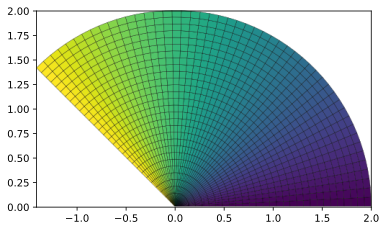

In [55]:
r, phi = np.meshgrid(np.linspace(0,2,30), np.linspace(0, 0.75*np.pi))
X, Y = r * np.cos(phi), r * np.sin(phi)
plt.pcolor(X, Y, phi, rasterized=True, edgecolor='k')
# edgecolor shows cell edges.
plt.axis('image')

## Multiple panels
There are two basic approaches to plots with multiple panels: producing a number of independent sub-plots or a set of plots which share some axes and/or the colour bar.

### `subplot`
Arguably the simplest solution. `plt.subplot` draws black axes in a designated area and makes them the active axes (i.e., they receive the following plotting commands).

In [56]:
x = np.linspace(0, 4 * np.pi, 100)

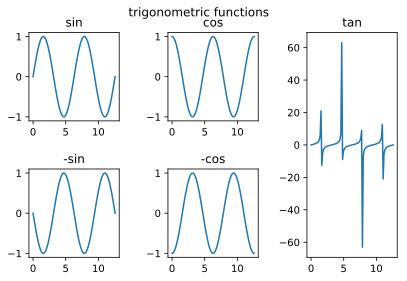

In [57]:
plt.subplot(2, 3, 1) # 2 rows, 3 columns, plot 1
plt.plot(x, np.sin(x))
plt.title('sin') # titles are set per subplot
plt.subplot(2, 3, 2) # 2 rows, 3 columns, plot 2
plt.plot(x, np.cos(x)); plt.title('cos')
plt.subplot(2, 3, 4) # 2 rows, 3 columns, plot 4
plt.plot(x, -np.sin(x)); plt.title('-sin')
plt.subplot(2, 3, 5) # 2 rows, 3 columns, plot 5
plt.plot(x, -np.cos(x)); plt.title('-cos')
plt.subplot(1,3,3) # 1 row, 3 columns, plot 3
plt.plot(x, np.tan(x)); plt.title('tan')
plt.suptitle('trigonometric functions')
plt.tight_layout(pad=1.5)
# automatically adjusts spacing between subplots

### `GridSpec`
`subplot` is not quite that easy once the panels are not of equal size. A more intuitive interface is given by `GridSpec`.

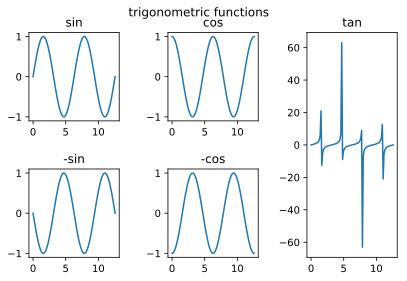

In [58]:
gs = plt.GridSpec(2,3) # 2 rows, 3 columns
plt.subplot(gs[0,0])
plt.plot(x, np.sin(x)); plt.title('sin')
plt.subplot(gs[0,1])
plt.plot(x, np.cos(x)); plt.title('cos')
plt.subplot(gs[1,0])
plt.plot(x, -np.sin(x)); plt.title('-sin')
plt.subplot(gs[1,1])
plt.plot(x, -np.cos(x)); plt.title('-cos')
plt.subplot(gs[:,2])
plt.plot(x, np.tan(x)); plt.title('tan')
plt.suptitle('trigonometric functions')
plt.tight_layout(pad=1.5)

### `AxesGrid`
For similar plots it is better to share some or all of the axes of the panels. `AxesGrid` takes care of this. We need to use it through the object-oriented interface (more on that later).

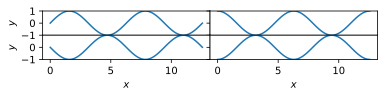

In [59]:
from mpl_toolkits.axes_grid1 import AxesGrid
gr = AxesGrid(plt.gcf(), # current figure
              111, # same as subplot(111) for the base axes
              [2,2], # rows and columns
              axes_pad=0., # no space between axes
             )
gr[0].plot(x, np.sin(x))
gr[1].plot(x, np.cos(x))
gr[2].plot(x, -np.sin(x))
gr[2].locator_params(axis='y', prune='upper')
gr[3].plot(x, -np.cos(x))
for g in gr:
    g.set_ylim(-1,1)
    g.set_xlabel('$x$')
    g.set_ylabel('$y$')

Grids of pseudo colour plots can share colour bars or have individual ones.

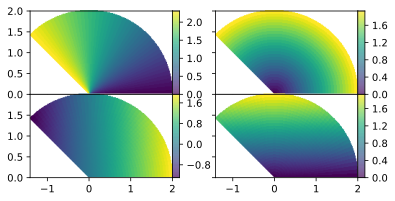

In [60]:
gr = AxesGrid(plt.gcf(), 111, [2,2], axes_pad=[0.5,0.],
              cbar_mode='each', cbar_pad=0.)
pc = gr[0].pcolor(X, Y, phi, rasterized=True)
gr[0].cax.colorbar(pc)
pc = gr[1].pcolor(X, Y, r, rasterized=True)
gr[1].cax.colorbar(pc)
pc = gr[2].pcolor(X, Y, X, rasterized=True)
gr[2].cax.colorbar(pc)
gr[2].locator_params(axis='y', prune='upper')
pc = gr[3].pcolor(X, Y, Y, rasterized=True)
gr[3].cax.colorbar(pc)

When sharing a colour bar, make sure to use the same limits for all panels.

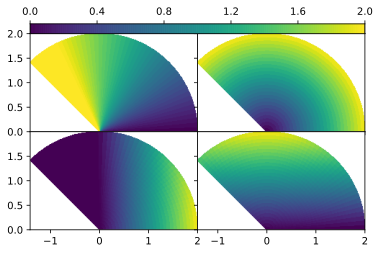

In [61]:
gr = AxesGrid(plt.gcf(), 111, [2,2], axes_pad=0.,
              cbar_mode='single', cbar_pad=0., cbar_location='top')
pc = gr[0].pcolor(X, Y, phi, rasterized=True, vmin=0., vmax=2.)
cb = gr[0].cax.colorbar(pc)
cb.solids.set_edgecolor('face') # workaround for bug
gr[1].pcolor(X, Y, r, rasterized=True, vmin=0., vmax=2.)
gr[2].pcolor(X, Y, X, rasterized=True, vmin=0., vmax=2.)
gr[2].locator_params(axis='y', prune='upper')
gr[3].pcolor(X, Y, Y, rasterized=True, vmin=0., vmax=2.)